In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from pythermalcomfort.models import set_tmp

# Data Cleaning

In [3]:
df_rawdata1 = pd.read_csv('Chinese Thermal Comfort Dataset Class I.csv', encoding='GBK')
print("calss 1 records:", len(df_rawdata1))
df_rawdata2 = pd.read_csv('Chinese Thermal Comfort Dataset Class II.csv', encoding='GBK')
print("calss 2 records:", len(df_rawdata2))
df_rawdata3 = pd.read_csv('Chinese Thermal Comfort Dataset Class III.csv', encoding='GBK')
print("calss 3 records:", len(df_rawdata3))
# concatenate the three datasets
df_rawdata = pd.concat([df_rawdata1, df_rawdata2, df_rawdata3], ignore_index=True)
print("total records:", len(df_rawdata))

calss 1 records: 7246
calss 2 records: 26184
calss 3 records: 8547
total records: 41977


In [4]:
# only select A4.Season = heating season
df_heating = df_rawdata[df_rawdata['A4.Season'] == 'Winter Season']
print("total heating records:", len(df_heating))

total heating records: 15992


In [5]:
df_heating['A5.City'].unique()

array(['Hebei Province,Handan City', 'Henan Province,Zhengzhou City',
       'Henan Province,Luoyang City', 'Tianjin City',
       'Liaoning Province,Dalian City',
       'Heilongjiang Province, Harbin City', 'Beijing',
       'Jiangsu Province,Changzhou City', 'Shanghai City',
       "Shaanxi Province,Xi'an City", 'Guangdong Province,Guangzhou City',
       'Beijing City', 'Baotou City', 'Turpan',
       'Hubei Province, Wuhan City', "Shaanxi Province, Xi'an City",
       'Hunan Province, Changsha City', 'Yunnan Province,Kunming City',
       'Lhasa City', 'Henan Province,Jiaozuo City',
       'Sichuan Province, Zigong City', 'Liaoning Province, Benxi City',
       'Henan Province, Nanyang City', 'Liaoning Province, Dalian City',
       'Hainan Province, Sanya City', 'Hunan Province, Hengyang City',
       'Shanxi Province, Lvliangfenyang City',
       'Henan Province, Pingdingshan City',
       'Yunnan Province, Kunming City', 'Shandong Province, Qingdao City',
       'Fujian Provinc

## Add latitude

In [6]:
df_heating['A5.City'].unique()

array(['Hebei Province,Handan City', 'Henan Province,Zhengzhou City',
       'Henan Province,Luoyang City', 'Tianjin City',
       'Liaoning Province,Dalian City',
       'Heilongjiang Province, Harbin City', 'Beijing',
       'Jiangsu Province,Changzhou City', 'Shanghai City',
       "Shaanxi Province,Xi'an City", 'Guangdong Province,Guangzhou City',
       'Beijing City', 'Baotou City', 'Turpan',
       'Hubei Province, Wuhan City', "Shaanxi Province, Xi'an City",
       'Hunan Province, Changsha City', 'Yunnan Province,Kunming City',
       'Lhasa City', 'Henan Province,Jiaozuo City',
       'Sichuan Province, Zigong City', 'Liaoning Province, Benxi City',
       'Henan Province, Nanyang City', 'Liaoning Province, Dalian City',
       'Hainan Province, Sanya City', 'Hunan Province, Hengyang City',
       'Shanxi Province, Lvliangfenyang City',
       'Henan Province, Pingdingshan City',
       'Yunnan Province, Kunming City', 'Shandong Province, Qingdao City',
       'Fujian Provinc

In [7]:
df_heating = df_heating.copy()
# remove comma and replace space by _ in the A5.City strings
df_heating['A5.City'] = df_heating['A5.City'].str.replace(' ', '')
df_heating['A5.City'] = df_heating['A5.City'].str.replace(',', '')

In [8]:
df_heating['A5.City'].unique()

array(['HebeiProvinceHandanCity', 'HenanProvinceZhengzhouCity',
       'HenanProvinceLuoyangCity', 'TianjinCity',
       'LiaoningProvinceDalianCity', 'HeilongjiangProvinceHarbinCity',
       'Beijing', 'JiangsuProvinceChangzhouCity', 'ShanghaiCity',
       "ShaanxiProvinceXi'anCity", 'GuangdongProvinceGuangzhouCity',
       'BeijingCity', 'BaotouCity', 'Turpan', 'HubeiProvinceWuhanCity',
       'HunanProvinceChangshaCity', 'YunnanProvinceKunmingCity',
       'LhasaCity', 'HenanProvinceJiaozuoCity',
       'SichuanProvinceZigongCity', 'LiaoningProvinceBenxiCity',
       'HenanProvinceNanyangCity', 'HainanProvinceSanyaCity',
       'HunanProvinceHengyangCity', 'ShanxiProvinceLvliangfenyangCity',
       'HenanProvincePingdingshanCity', 'ShandongProvinceQingdaoCity',
       'FujianProvinceZhenjiangCity', 'ShandongProvinceYantaiCity',
       'HohhotCity', 'FujianProvinceFuzhouCity',
       'ShandongProvinceXintaiCity', 'HenanProvinceKaifengCity',
       'FujianProvinceNanpingCity'], dtype=

In [9]:
city_dict_lat = {
    "HebeiProvinceHandanCity": 36.62,  
    "HenanProvinceZhengzhouCity": 34.75,  
    "TianjinCity": 39.12,  
    "LiaoningProvinceDalianCity": 38.92,  
    "HeilongjiangProvinceHarbinCity": 45.75,  
    "Beijing": 39.90,  
    "JiangsuProvinceChangzhouCity": 31.78,  
    "ShanghaiCity": 31.23,  
    "ShaanxiProvinceXi'anCity": 34.26,  
    "GuangdongProvinceGuangzhouCity": 23.13,  
    "BaotouCity": 40.65,  
    "Turpan": 42.94,  
    "HubeiProvinceWuhanCity": 30.58,  
    "HunanProvinceChangshaCity": 28.23,  
    "YunnanProvinceKunmingCity": 24.87,  
    "LhasaCity": 29.65,  
    "HenanProvinceJiaozuoCity": 35.24,  
    "SichuanProvinceZigongCity": 29.34,  
    "LiaoningProvinceBenxiCity": 41.29,  
    "HenanProvinceNanyangCity": 32.99,  
    "HainanProvinceSanyaCity": 18.25,  
    "HunanProvinceHengyangCity": 26.89,  
    "ShanxiProvinceLvliangfenyangCity": 37.51,  
    "HenanProvincePingdingshanCity": 33.74,  
    "ShandongProvinceQingdaoCity": 36.07,  
    "FujianProvinceZhenjiangCity": 32.21,
    "ShandongProvinceYantaiCity": 37.53,  
    "HohhotCity": 40.82,  
    "FujianProvinceFuzhouCity": 26.08,  
    "ShandongProvinceXintaiCity": 35.90,
    "HenanProvinceKaifengCity": 34.79,  
    "FujianProvinceNanpingCity": 26.64,  
}
# create a new column 'latitude' and in df_heating and assign the latitude value to corresponding city
df_heating['latitude'] = df_heating['A5.City'].map(city_dict_lat)

In [10]:
city_dict_tout = {
    "HebeiProvinceHandanCity": -7.28,  
    "HenanProvinceZhengzhouCity": -5.6,  
    "TianjinCity": -10.97,  
    "LiaoningProvinceDalianCity": -13.44,  
    "HeilongjiangProvinceHarbinCity": -27.75,  
    "Beijing": -10.05,  
    "JiangsuProvinceChangzhouCity": -3,  # Estimated
    "ShanghaiCity": -2.16,  
    "ShaanxiProvinceXi'anCity": -6,  # Estimated
    "GuangdongProvinceGuangzhouCity": 4.98,  
    "BaotouCity": -18,  # Estimated
    "Turpan": -16.5,  
    "HubeiProvinceWuhanCity": -2.53,  
    "HunanProvinceChangshaCity": -1.8,  
    "YunnanProvinceKunmingCity": 0.95,  
    "LhasaCity": -7.02,  
    "HenanProvinceJiaozuoCity": -5.05,  
    "SichuanProvinceZigongCity": 2.19,  
    "LiaoningProvinceBenxiCity": -21.73,  
    "HenanProvinceNanyangCity": -4.81,  
    "HainanProvinceSanyaCity": 13.22,  
    "HunanProvinceHengyangCity": -1.31,  
    "ShanxiProvinceLvliangfenyangCity": -12,  # Estimated
    "HenanProvincePingdingshanCity": -13.79,  
    "ShandongProvinceQingdaoCity": -7.78,  
    "ShandongProvinceYantaiCity": -5,  # Estimated
    "ShandongProvinceXintaiCity": -6,  # Estimated
    "FujianProvinceZhenjiangCity": 3,  # Estimated, assuming a typo and meant for a Fujian city
    "FujianProvinceNanpingCity": 2,  # Estimated
    "HohhotCity": -21.05,  
    "FujianProvinceFuzhouCity": 4.59,
    "HenanProvinceKaifengCity": -6.2,
}
# create a new column 'latitude' and in df_heating and assign the latitude value to corresponding city
df_heating['t_out'] = df_heating['A5.City'].map(city_dict_tout)

## Rename columns

In [11]:
df_heating.columns

Index(['ID', 'A1.Code', 'A2.Date', 'A3.Data Contributor', 'A4.Season',
       'A5.City', 'A6.Climate Zone', 'B1.Building Type',
       'B2.Building Function', 'B3.Floors', 'B4.Building Operation Mode',
       'B5.Room (Length×Width)', 'B5.Room Height (m)', 'C1.Sex', 'C2.Age',
       'C3.Height（cm）', 'C4.Weight（kg）', 'C5.Living Years', 'D1.TSV', 'D2.TCV',
       'D3.TAV', 'D5.Clothing Insulation (clo)', 'D6.Metabolic Rate (met)',
       'Measured Height (m)', 'E1.Indoor Air Temperature (℃)',
       'E2.Indoor Relative Humidity (%)', 'E3.Indoor Air Velocity (m/s)',
       'E4.Globe Temperature (℃)', 'E5.Roof Temperature (℃)',
       'E5.Wall Temperature (℃)', 'E5.Floor Temperature (℃)',
       'F1.Operative Temperature (℃)', 'F2.Mean Radiant Temperature (℃)',
       'F3.Radiant Temperature Asymmetry (℃)', 'F4.PMV', 'F5.PPD',
       'G1.Real-Time Outdoor Temperature (℃)',
       'G2.Mean Daily Outdoor Temperature (℃)',
       'G3.Monthly Mean Outdoor Temperature (℃)',
       'G4.7-Day Run

In [12]:
# rename personal conditions
df_heating = df_heating.rename(columns={'D1.TSV': 'tsv'})
df_heating = df_heating.rename(columns={'D2.TCV': 'tcv'})
df_heating = df_heating.rename(columns={'D3.TAV': 'tav'})
df_heating = df_heating.rename(columns={'D5.Clothing Insulation (clo)': 'clo'})
df_heating = df_heating.rename(columns={'D6.Metabolic Rate (met)': 'met'})
# rename  indoor environment parameters
df_heating = df_heating.rename(columns={'E1.Indoor Air Temperature (℃)': 't_db'})
df_heating = df_heating.rename(columns={'E2.Indoor Relative Humidity (%)': 'rh'})
df_heating = df_heating.rename(columns={'E3.Indoor Air Velocity (m/s)': 'vel'})
df_heating = df_heating.rename(columns={'E4.Globe Temperature (℃)': 't_globe'})
df_heating = df_heating.rename(columns={'F1.Operative Temperature (℃)': 't_op'})
df_heating = df_heating.rename(columns={'F2.Mean Radiant Temperature (℃)': 't_mrt'})
# rename outdoor temperature parameters
df_heating = df_heating.rename(columns={'G1.Real-Time Outdoor Temperature (℃)': 't_out_realtime'})
df_heating = df_heating.rename(columns={'G2.Mean Daily Outdoor Temperature (℃)': 't_out_daily'})
df_heating = df_heating.rename(columns={'G3.Monthly Mean Outdoor Temperature (℃)': 't_out_monthly'})
df_heating = df_heating.rename(columns={'G4.7-Day Running Mean Outdoor Temperature (℃)': 't_out_7'})
df_heating = df_heating.rename(columns={'G4.15-Day Running Mean Outdoor Temperature (℃)': 't_out_15'})


## Remove null data

In [13]:
numeric_columns = ['t_db', 't_mrt', 'vel', 'rh', 'met', 'clo', 't_op', 'tsv', 't_out_monthly', 't_out_7', 't_out_15', 't_out_daily', 't_out_realtime', 't_globe']
# for loop convert int or str to float for numeric columns
for column in numeric_columns:
    df_heating[column] = df_heating[column].astype(float)
print("total records:", len(df_heating))

total records: 15992


In [14]:
drop_columns = ['t_op', 'tsv', 'latitude']
df_heating_1 = df_heating.dropna(subset = drop_columns)
print("total records:", len(df_heating_1))

total records: 15623


In [15]:
drop_columns = ['t_op', 'tsv', 't_out']
df_heating_2 = df_heating.dropna(subset = drop_columns)
print("total records:", len(df_heating_2))

total records: 15623


In [16]:
# df_heating['t_set'] = df_heating.apply(lambda row: set_tmp(
#     tdb=row['t_db'], 
#     tr=row['t_mrt'], 
#     v=row['vel'], 
#     rh=row['rh'], 
#     met=row['met'], 
#     clo=row['clo']
# ), axis=1)

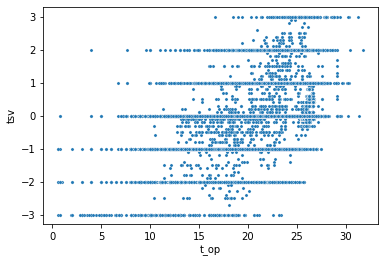

In [17]:
# scatter plot of t_out_monthly_yrmin as x and t_n as y, and show city name of each point
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df_heating, x='t_op', y='tsv', s=10)
plt.show()

# Neutral temperature

In [18]:
def regression_op_a(data_bldg):
    """
    TSV = a * t_op + b
    Regressing Thermal Sensation Vote (TSV) against indoor operative temperature (t_op).    
    Use the regression model to derive the neutral temperature by letting TSV equals 0.
    The upper and lower limit of 80% comfort zone are derived by letting TSV equals +-0.85.
    """
    lm_result = smf.ols(formula='tsv ~ t_op', data=data_bldg).fit()
    slope = lm_result.params['t_op']
    intercept = lm_result.params['Intercept']
    # check whether the slope is significant
    if lm_result.pvalues['t_op'] < 0.05:
        a = slope
        b = intercept
        temp_n = -b / a
        temp_up = (0.85-b)/a
        temp_low = (-0.85-b)/a
        return [slope, intercept, temp_n, temp_up, temp_low]
    else:
        return [np.nan] * 5  # Return NaNs if the slope is not significant

def regression_op_b(data_bldg):
    """
    op = a * TSV + b
    Regressing Standard Effective Temperature (op) against Thermal Sensation Vote (TSV).
    Use the regression model to derive the neutral temperature by letting TSV equals 0.
    The upper and lower limit of 80% comfort zone are derived by letting TSV equals +-0.85.
    """
    lm_result = smf.ols(formula='t_op ~ tsv', data=data_bldg).fit()
    slope = lm_result.params['tsv']
    intercept = lm_result.params['Intercept']
    # check whether the slope is significant
    if lm_result.pvalues['tsv'] < 0.05:
        a = slope
        b = intercept
        temp_n = b
        temp_up = 0.85*a + b
        temp_low = (-0.85)*a + b
        sig_model = [slope, intercept, temp_n, temp_up, temp_low]
        return sig_model
    else:
        return [np.nan] * 5


In [36]:
# create a new dataframe grouped by city, store number of records as a column, calculate the mean of t_op, tsv, latitude
df_heating_city = df_heating_1.groupby('A5.City').agg(
    records=('A5.City', 'size'),
    t_op=('t_op', 'mean'),
    tsv=('tsv', 'mean'),
    clo=('clo', 'mean'),
    latitude=('latitude', 'mean'),
    t_out=('t_out', 'mean')
).reset_index()

In [37]:
df_heating_city = df_heating_city.copy()
# Apply the function to each group of df_heating grouped by 'A5.City'
grouped_results = df_heating.groupby('A5.City').apply(regression_op_a)
results_df = pd.DataFrame(grouped_results.tolist(), index=grouped_results.index, columns=['slope', 'intercept', 'temp_n', 'temp_up', 'temp_low'])
df_heating_city = df_heating_city.merge(results_df, left_on='A5.City', right_index=True, how='left')

In [38]:
# # read db2_ahmedabad.csv, db2_kolkata.csv, db2_delhi.csv
# df_ahmedabad = pd.read_csv('db2_ahmedabad.csv')
# df_delhi = pd.read_csv('db2_delhi.csv')
# for i in [df_ahmedabad, df_delhi]:
#     i = i.rename(columns={'thermal_sensation': 'tsv'})
#     i = i.rename(columns={'top': 't_op'})
#     print(i.city.unique()[0], len(i))
#     print('top_mean, tsv_mean', i['t_op'].mean(), i['tsv'].mean())
#     print("neutral temp_b", regression_op_b(i)[2])
#     # append the results to df_heating_city
# df_heating_city = df_heating_city.append({'A5.City': 'Ahmedabad', 'records': 192, 't_op': 28.68776, 'tsv': 0.182, 'latitude': 23.02, 'slope': np.nan, 'intercept': np.nan, 'temp_n': 28.4432, 'temp_up': np.nan, 'temp_low': np.nan}, ignore_index=True)
# df_heating_city = df_heating_city.append({'A5.City': 'Delhi', 'records': 96, 't_op': 21.5383, 'tsv': -0.72916, 'latitude': 28.70, 'slope': np.nan, 'intercept': np.nan, 'temp_n': 22.05647, 'temp_up': np.nan, 'temp_low': np.nan}, ignore_index=True)

In [44]:
# using griffith method to estimate temp_n
df_heating_city['temp_n_grif'] = df_heating_city['t_op'] + (0 - df_heating_city['tsv'])*4.0

In [45]:
# find the A3.Data Contributor in df_heating when A5.City is 'FujianProvinceFuzhouCity'
for i in ['FujianProvinceFuzhouCity', 'FujianProvinceNanpingCity', 'FujianProvinceZhenjiangCity', 'HainanProvinceSanyaCity', 'HenanProvinceKaifengCity', 'HenanProvincePingdingshanCity', 'HunanProvinceHengyangCity', 'ShandongProvinceQingdaoCity', 'ShandongProvinceXintaiCity', 'ShandongProvinceYantaiCity', 'ShanxiProvinceLvliangfenyangCity']:
    print(df_heating[df_heating['A5.City'] == i]['A3.Data Contributor'].unique())

['Tongji University']
['Tongji University']
['Tongji University']
['Tongji University']
['Tongji University']
['Tongji University']
['Tongji University']
['Tongji University']
['Tongji University']
['Tongji University']
['Tongji University']


In [46]:
# print rows with records less than 30 as a list
print(df_heating_city[df_heating_city['records'] < 10]['A5.City'].to_list())
# rows with records less than 30 as a list
df_heating_city[df_heating_city['records'] < 10]

['FujianProvinceFuzhouCity', 'FujianProvinceNanpingCity', 'FujianProvinceZhenjiangCity', 'HainanProvinceSanyaCity', 'HenanProvinceKaifengCity', 'HenanProvincePingdingshanCity', 'HunanProvinceHengyangCity', 'ShandongProvinceQingdaoCity', 'ShandongProvinceXintaiCity', 'ShandongProvinceYantaiCity', 'ShanxiProvinceLvliangfenyangCity']


,A5.City,records,t_op,tsv,clo,latitude,t_out,slope,intercept,temp_n,temp_up,temp_low,temp_n_grif
2,FujianProvinceFuzhouCity,7,18.100000,-0.714286,0.351429,26.08,4.59,NaN,NaN,NaN,NaN,NaN,20.957143
3,FujianProvinceNanpingCity,4,17.900000,0.000000,0.417500,26.64,2.00,NaN,NaN,NaN,NaN,NaN,17.900000
4,FujianProvinceZhenjiangCity,2,22.900000,-0.500000,0.305000,32.21,3.00,NaN,NaN,NaN,NaN,NaN,24.900000
6,HainanProvinceSanyaCity,5,24.880000,0.600000,0.332000,18.25,13.22,NaN,NaN,NaN,NaN,NaN,22.480000
10,HenanProvinceKaifengCity,1,13.000000,0.000000,0.420000,34.79,-6.20,NaN,NaN,NaN,NaN,NaN,13.000000
12,HenanProvincePingdingshanCity,5,17.560000,-0.800000,0.792000,33.74,-13.79,NaN,NaN,NaN,NaN,NaN,20.760000
17,HunanProvinceHengyangCity,1,16.900000,-1.000000,0.660000,26.89,-1.31,NaN,NaN,NaN,NaN,NaN,20.900000
23,ShandongProvinceQingdaoCity,1,23.000000,1.000000,0.500000,36.07,-7.78,NaN,NaN,NaN,NaN,NaN,19.000000
24,ShandongProvinceXintaiCity,3,22.833333,0.333333,0.686667,35.90,-6.00,NaN,NaN,NaN,NaN,NaN,21.500000
25,ShandongProvinceYantaiCity,7,25.671429,0.857143,0.804286,37.53,-5.00,NaN,NaN,NaN,NaN,NaN,22.242857


In [47]:
df_heating_city

,A5.City,records,t_op,tsv,clo,latitude,t_out,slope,intercept,temp_n,temp_up,temp_low,temp_n_grif
0,BaotouCity,303,19.277228,0.016502,0.341782,40.65,-18.00,0.058187,-1.105179,18.993630,33.601747,4.385513,19.211221
1,Beijing,327,22.216820,-0.073394,1.074098,39.90,-10.05,0.125231,-2.855620,22.802894,29.590374,16.015415,22.510398
2,FujianProvinceFuzhouCity,7,18.100000,-0.714286,0.351429,26.08,4.59,NaN,NaN,NaN,NaN,NaN,20.957143
3,FujianProvinceNanpingCity,4,17.900000,0.000000,0.417500,26.64,2.00,NaN,NaN,NaN,NaN,NaN,17.900000
4,FujianProvinceZhenjiangCity,2,22.900000,-0.500000,0.305000,32.21,3.00,NaN,NaN,NaN,NaN,NaN,24.900000
5,GuangdongProvinceGuangzhouCity,997,23.876128,-0.013039,0.859910,23.13,4.98,0.096541,-2.318054,24.011192,32.815779,15.206605,23.928285
6,HainanProvinceSanyaCity,5,24.880000,0.600000,0.332000,18.25,13.22,NaN,NaN,NaN,NaN,NaN,22.480000
7,HebeiProvinceHandanCity,26,19.300000,-0.384615,1.447692,36.62,-7.28,0.136763,-3.024134,22.112285,28.327434,15.897135,20.838462
8,HeilongjiangProvinceHarbinCity,3552,22.707995,0.293300,0.923361,45.75,-27.75,0.158973,-3.316655,20.863029,26.209855,15.516203,21.534797
9,HenanProvinceJiaozuoCity,888,16.798874,-0.255631,1.188874,35.24,-5.05,0.064043,-1.331476,20.790437,34.062825,7.518049,17.821396


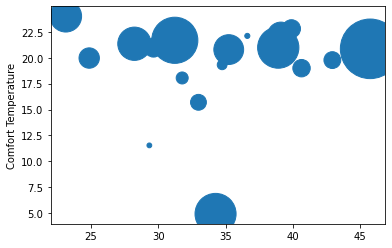

In [43]:
# plot the scatter plot of t_out_monthly and temp_n, data point size is proportional to the number of records
plt.figure(figsize=(6, 4))
x = df_heating_city['latitude']
y = df_heating_city['temp_n']
sizes = df_heating_city['records']  # This will control the size of the points
plt.scatter(x, y, s=sizes)  # Use the 's' parameter to set sizes of points
plt.ylabel('Comfort Temperature')
plt.show()

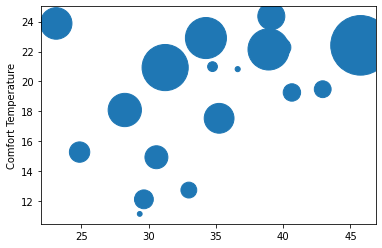

In [27]:
# plot the scatter plot of t_out_monthly and temp_n, data point size is proportional to the number of records
plt.figure(figsize=(6, 4))
x = df_heating_city['latitude']
y = df_heating_city['temp_n']
sizes = df_heating_city['records']  # This will control the size of the points
plt.scatter(x, y, s=sizes)  # Use the 's' parameter to set sizes of points
plt.ylabel('Comfort Temperature')
plt.show()

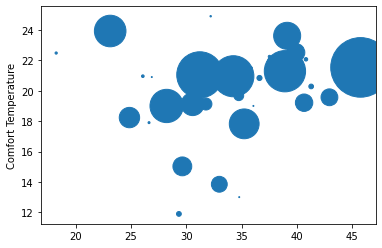

In [48]:
# plot the scatter plot of t_out_monthly and temp_n, data point size is proportional to the number of records
plt.figure(figsize=(6, 4))
x = df_heating_city['latitude']
y = df_heating_city['temp_n_grif']
sizes = df_heating_city['records']  # This will control the size of the points
plt.scatter(x, y, s=sizes)  # Use the 's' parameter to set sizes of points
plt.ylabel('Comfort Temperature')
plt.show()
